In [16]:
import urllib
import pandas as pd
from io import StringIO

# url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
# with urllib.request.urlopen(url) as response:
#     html = response.read()


In [17]:
df_wine = pd.read_csv('winequality-white.csv', delimiter=';')


In [20]:
df_wine
X = df_wine.iloc[:, :-1]
y = df_wine.iloc[:, -1]

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=0)
X_train.shape

(3428, 11)

In [89]:
from sklearn.linear_model import Ridge , Lasso
from sklearn import metrics

regularization_strength_list = [0.000000001]
degree = 4


for i, regularization_strength in enumerate(regularization_strength_list):

    polynomial_features = PolynomialFeatures(degree,
                                             include_bias=False)
    ridge_regression = Ridge(alpha=regularization_strength)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("ridge_regression", ridge_regression)])
    
    pipeline.fit(X_train, y_train)
    
    predicted = pipeline.predict(X_test)
    predicted_rounded = np.round(predicted)
    
    print(regularization_strength, metrics.accuracy_score(y_test, predicted_rounded) )
   

1e-09 0.492517006803


In [108]:
X_1 = X.values
y_1 = y.values

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)


accuraces = []
shapes = []
for step in range(X.shape[1]):

    lasso_regression = Lasso(alpha=0.01)
    lasso_regression.fit(X_train, y_train)
    predicted = lasso_regression.predict(X_test)
    predicted_rounded = np.round(predicted)
    print(metrics.accuracy_score(y_test, predicted_rounded))
    accuraces.append(metrics.accuracy_score(y_test, predicted_rounded))
    shapes.append(X_train.shape[1])
    print(lasso_regression.coef_)
    to_delete = min(enumerate(np.abs(lasso_regression.coef_)), key=lambda x: x[1])[0]
    X_train = np.delete(X_train, to_delete, 1)
    X_test = np.delete(X_test, to_delete, 1)

    

0.480272108844
[-0.03463003 -0.85745956  0.          0.02045072 -0.          0.00797277
 -0.00165024 -0.          0.          0.          0.34925969]
0.480272108844
[-0.03463003 -0.85745956  0.02045072 -0.          0.00797277 -0.00165024
 -0.          0.          0.          0.34925969]
0.480272108844
[-0.03463003 -0.85745956  0.02045072  0.00797277 -0.00165024 -0.          0.
  0.          0.34925969]
0.480272108844
[-0.03463003 -0.85745956  0.02045072  0.00797277 -0.00165024  0.          0.
  0.34925969]
0.480272108844
[-0.03463003 -0.85745956  0.02045072  0.00797277 -0.00165024  0.
  0.34925969]
0.480272108844
[-0.03463003 -0.85745956  0.02045072  0.00797277 -0.00165024  0.34925969]
0.475510204082
[-0.04190278 -0.96352684  0.01891349  0.00578909  0.36469008]
0.482993197279
[-0.05247337 -1.07963783  0.02396534  0.35384197]
0.490476190476
[-0.04661623 -0.99893878  0.30831411]
0.481632653061
[-0.99093644  0.31232656]
0.427891156463
[-0.77569877]


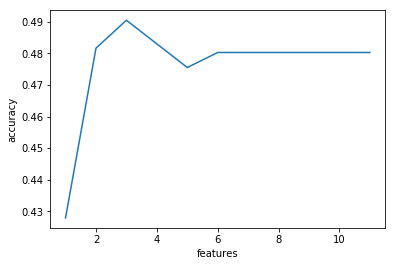

In [110]:
plt.plot(shapes, accuraces)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.show()


In [117]:
print('Best 2 features: {0} AND {1}'.format(df_wine.columns[1], df_wine.columns[-2]))

Best 2 features: volatile acidity AND alcohol


In [118]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6
